# <span style="color:#0b486b">SIT 112 - Data Science Concepts</span>

---
Lecturer: Truyen Tran | truyen.tran@deakin.edu.au<br />


School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

---

## <span style="color:#0b486b">Practical Session 4: Skills you need to deal with the data</span>

**The purpose of this session is to teach you:**

* Become familiar with numpy package
* Become familiar with matplotlib pasckage
* Gain an understanding of the availability of data sources: rss feed, public data domain
* Be able to: load, .xls, .csv and .json and export them into different data format
* Plot a histogram and a boxplot
---

## <span style="color:#0b486b">1. Numpy</span>


Python lists are very flexible for storing any sequence of Python objects. But usually flexibility comes at the price of performance and therefore Python lists are not ideal for numerical calculations where we are interested in performance. Here is where **NumPy** comes in. It adds support for large, multi-dimensional arrays and matrices, along with high-level mathematical functions to operate on these arrays to Python. 

Relying on `'BLAS'` and `'LAPACK'`, `'NumPy'` gives a functionality comparable with `'MATLAB'` to Python. NumPy facilitates advanced mathematical and other types of operations on large numbers of data. Typically, such operations are executed more efficiently and with less code than is possible using Python’s built-in sequences. It has become one of the fundamental packages used for numerical computations.

In this tutorial we will review its basics, so to learn more about NumPy, visit [NumPy User Guide](http://docs.scipy.org/doc/numpy/user/index.html)

### <span style="color:#0b486b">1.1 Importing Numpy</span>

As you have learnt in tutorial 2, first we have to import a package to be able to use it. NumPy is imported with:

In [1]:
import numpy

It is the convention to import it like with an alias:

In [2]:
import numpy as np

### <span style="color:#0b486b">1.2 Numpy arrays</span>

The core of NumPy is its arrays. You can create an array from a Python list or tuple using `'array'` function. They work similarly to lists apart from the fact that:

* you can easily perform element-wise operation on them, and
* unlike lists, they should be pre-allocated.

The first point is further explained in [Array operations section](2-prac4.ipynb#1.4-Array-operations). The second point means that you there is no equivalent to list append for arrays. The size of the arrays is known at the time it is defined.

#### <span style="color:#0b486b">1.2.1 create an array from a list</span>

In [3]:
x = [1, 7, 3, 4, 0, -5]


In [4]:
y = np.array(x)
type(y)

numpy.ndarray

#### <span style="color:#0b486b">1.2.2 create an array using a range</span>

In [5]:
range(5)

range(0, 5)

In [6]:
print(np.array(range(5)))

[0 1 2 3 4]


In [7]:
print(np.arange(2, 3, 0.2))

[ 2.   2.2  2.4  2.6  2.8]


In [8]:
# returns numbers spaced evenly on a linear scale, both endpoints are included
# (2, 3, 5): two endpoints are 2 & 3 and there're 5 numbers in the array.
print(np.linspace(2, 3, 5))

[ 2.    2.25  2.5   2.75  3.  ]


In [9]:
print(np.logspace(2, 3, 5))    # returns numbers spaced evenly on a log scale

[  100.           177.827941     316.22776602   562.34132519  1000.        ]


**Note:** If you need any help on how to use a function or what it does, you can use IPython help. Just add a question mark (?) at the end of the function and execute the cell:

In [10]:
np.logspace

<function numpy.core.function_base.logspace>

#### <span style="color:#0b486b">1.2.3 create a prefilled array</span>

In [11]:
print(np.zeros(5))

[ 0.  0.  0.  0.  0.]


In [12]:
print(np.ones(5, dtype=int))    # you can specify the data type, default is float

[1 1 1 1 1]


#### <span style="color:#0b486b">1.2.4 `'mgrid'`</span>
similar to meshgrid in MATLAB:

In [13]:
x, y = np.mgrid[0:5, 0:3]

print(x)
print(y)

[[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]


#### <span style="color:#0b486b">1.2.5 array attributes</span>
NumPy arrays have multiple attributes and methods. The cell below shows a few of them. You can press tab after typeing the dot operator `'(.)'` to use IPython auto-complete and see the rest of them.

In [14]:
y = np.array([3, 0, -4, 6, 12, 2])

In [15]:
print("number of dimensions:\t", y.ndim)
print("dimension of the array:", y.shape)       
print("numerical data type:\t", y.dtype)
print("maximum of the array:\t", y.max())       
print("index of the array max:", y.argmax())
print("mean of the array:\t", y.mean())

number of dimensions:	 1
dimension of the array: (6,)
numerical data type:	 int64
maximum of the array:	 12
index of the array max: 4
mean of the array:	 3.16666666667


#### <span style="color:#0b486b">1.2.6 Multi-dimensional arrays</span>


You can define arrays with 2 (or higher) dimensions in numpy:

##### from lists

In [16]:
x = [[1, 2, 10, 20], [3, 4, 30, 40]]
y = np.array(x)
print(y)
print()
print(y.ndim, y.shape)

[[ 1  2 10 20]
 [ 3  4 30 40]]

2 (2, 4)


##### pre-filled 

In [17]:
x = np.ones((3, 5), dtype='int')

In [18]:
print(x)
print()
print(x.ndim, x.shape)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

2 (3, 5)


##### `'diag()'`
diagonal matrix

In [19]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

### <span style="color:#0b486b">1.3 Manipulating arrays</span>


#### <span style="color:#0b486b">1.3.1 Indexing</span>


Similar to lists, you can index elements in an array using `'[]'` and indices:

If `'x'` is a 1-dimensional array, `'x[i]'` will index `'ith'` element of `'x'`:

In [20]:
x = np.array([2, 8, -2, 4, 3])
print(x[3])

4


If 'x' is a 2-dimensional arrray:

* '`x[i, j]'` or `'x[i][j]'` will index the element in `'ith'` row and `'jth'` column
* '`x[i, :]'` will index the `'ith'` row 
* `'x[:, j]'` will index `'jth'` column

In [21]:
x = np.array([[7, 6, 8, 6, 4],
              [4, 7, -2, 0, 9]])
              
print(x[1, 3])

0


In [22]:
print(x[1, :])      # or x[1]

[ 4  7 -2  0  9]


In [23]:
print(x[:, 3])

[6 0]


Arrays can also be indexed with other arrays:

In [24]:
x = np.array([2, 8, -2, 4, 3, 9, 0])

idx1 = [1, 3, 4]        # list
idx2 = np.array(idx1)   # array

print(x[idx1], x[idx2])
x[idx2] = 0
print(x)

[8 4 3] [8 4 3]
[ 2  0 -2  0  0  9  0]


You can also index masks. The index mask should be a NumPy arrays of data type Bool. Then the element of the array is selected only if the index mask at the position of the element is True.

In [25]:
x = np.array([2, 8, -2, 4, 3, 9, 0])

In [26]:
mask = np.array([False, True, True, False, False, True, False])

In [27]:
x[mask]

array([ 8, -2,  9])

Combining index masks with comparison operaors enabels you to conditinoally slecect elements of the array.

In [28]:
x = np.array([2, 8, -2, 4, 3, 9, 0])
mask = (x>=2) * (x<9)
x[mask]

array([2, 8, 4, 3])

#### <span style="color:#0b486b">1.3.2 Slicing</span>


Similar to Python lists, arrays can also be sliced:

In [29]:
x = np.array([2, 8, -2, 4, 3, 9, 0])

print(x[3:])    # slicing
print(x[3:7:2])  # slicing with a specified step

[4 3 9 0]
[4 9]


In [30]:
x = np.array([[7, 6, 8, 6, 4, 3],
              [4, 7, 0, 5, 9, 5],
              [7, 3, 6, 3, 5, 1]])
              

print(x[1, 1:4])
print()
print(x[:2, 1::2])    # rows zero up to 3, cols 1 up to end with a step=2

[7 0 5]

[[6 6 3]
 [7 5 5]]


#### <span style="color:#0b486b">1.3.3 Iteration over items</span>


Since most of NumPy functions are capable of operating on arrays, in many cases iteration over items of an arrays can be (and should be) avoided. Otherwise it is pretty much similar to iterating over values of a list:

In [31]:
a = np.arange(0, 50, 7)
print(a)
for item in a:
    print(item, end=' ')

[ 0  7 14 21 28 35 42 49]
0 7 14 21 28 35 42 49 

Of course you could iterate over items using their indices too:

In [32]:
a = np.arange(0, 50, 7)
for i in range(a.shape[0]):
    print(a[i], end=' ')

0 7 14 21 28 35 42 49 

There are also many functions for manipulating arrays. The most used ones are:

#### 1.3.4 `copy()`

**Remember** that assignment operator is not an equivalent for copying arrays. In fact Python does not pass the values. It passess the references.

In [33]:
x = [1, 2, 3]
y = x
print(x, y)

[1, 2, 3] [1, 2, 3]


In [34]:
y[0] = 0       # now we alter an element of y
print(x, y)     # note that x has changed as well

[0, 2, 3] [0, 2, 3]


Same is true for numpy arrays. That's why if you need a copy of an array, you should use `'copy()'` function.

In [35]:
x = np.array([1, 2, 3])
y = x

y[0] = 0       # now we alter an element of y
print(x, y)     # note that x has changed as well

[0 2 3] [0 2 3]


In [36]:
x = np.array([1, 2, 3])
y = x.copy()  # or np.copy(x)
y[0] = 0

print(x, y)

[1 2 3] [0 2 3]


#### 1.3.5 `reshape()`

In [37]:
x1 = np.arange(6)
x2 = x1.reshape((2, 3))    # or np.reshape(x1, (2, 3))

print(x1)
print()
print(x2)

[0 1 2 3 4 5]

[[0 1 2]
 [3 4 5]]


#### 1.3.6 `astype()`

Used for type casting:

In [38]:
x1 = np.arange(5)
x2 = x1.astype(float)

print(type(x1), x1)
print(type(x2), x2)

<class 'numpy.ndarray'> [0 1 2 3 4]
<class 'numpy.ndarray'> [ 0.  1.  2.  3.  4.]


#### 1.3.7 `T`

transpose method:

In [39]:
x1 = np.random.randint(5, size=(2, 4))
x2 = x1.T

print(x1)
print()
print(x2)

[[3 4 2 4]
 [4 0 4 0]]

[[3 4]
 [4 0]
 [2 4]
 [4 0]]


### <span style="color:#0b486b">1.4 Array operations</span>


#### <span style="color:#0b486b">1.4.1 Arithmetic operators</span>


Arrays can be added, subtracted, multiplied and divided using +, -, \* and, /. Operations done by these operators are **element wise**.

In [40]:
x1 = np.array([[2, 3, 5, 7], 
               [2, 4, 6, 8]], dtype=float)
x2 = np.array([[6, 5, 4, 3], 
               [9, 7, 5, 3]], dtype=float)

print(x1)
print()
print(x2)

[[ 2.  3.  5.  7.]
 [ 2.  4.  6.  8.]]

[[ 6.  5.  4.  3.]
 [ 9.  7.  5.  3.]]


In [41]:
print(x1 + x2)

[[  8.   8.   9.  10.]
 [ 11.  11.  11.  11.]]


In [42]:
print(x1 - x2)

[[-4. -2.  1.  4.]
 [-7. -3.  1.  5.]]


In [43]:
print(x1 * x2)

[[ 12.  15.  20.  21.]
 [ 18.  28.  30.  24.]]


In [44]:
print(x1 / x2)

[[ 0.33333333  0.6         1.25        2.33333333]
 [ 0.22222222  0.57142857  1.2         2.66666667]]


In [45]:
print(3 + x1)

[[  5.   6.   8.  10.]
 [  5.   7.   9.  11.]]


In [46]:
print(3 * x1)

[[  6.   9.  15.  21.]
 [  6.  12.  18.  24.]]


In [47]:
print(3 / x1)

[[ 1.5         1.          0.6         0.42857143]
 [ 1.5         0.75        0.5         0.375     ]]


#### <span style="color:#0b486b">1.4.2 Boolean operators</span>

Much like arethmaic operators discussed above, boolean (comparison) operatos perform element-wise on arrays.

In [48]:
x1 = np.array([2, 3, 5, 7])
x2 = np.array([2, 4, 6, 7])
y = x1<x2

print(y, y.dtype)

[False  True  True False] bool


use methods `'.any()'` and `'.all()'` to return a single boolean value indicating whether any or all values in the array are True respectively. This value in turn can be used as a condition for an `'if'` statement.

In [49]:
print(y.all())
print(y.any())

False
True


NumPy has many other functions that you can read about them in [NumPy User Guide](http://docs.scipy.org/doc/numpy/user/). Specially read about:

* `np.unique`, returns unique elements of an array
* `np.flatten`, flattens a multi-dimensional array
* `np.mean`, `np.std`, `np.median`
* `np.min`, `np.max`, `np.argmin`, `np.argmax`

### <span style="color:#0b486b">1.5 np.random</span>


NumPy has a module called `random` to generate arrays of random numbers. There are different ways to generate a random number:

In [50]:
print(np.random.rand())

0.06766396382746387


In [51]:
# 2x5 random array drawn from standard normal distribution
print(np.random.random([2, 5]))

[[ 0.36916213  0.81694049  0.31069996  0.87210078  0.55056987]
 [ 0.96743244  0.00463777  0.12685442  0.60032194  0.67367054]]


In [52]:
# 2x5 random array drawn from standard normal distribution
print(np.random.rand(2, 5))

[[ 0.28723098  0.99254777  0.46495909  0.19981495  0.28057518]
 [ 0.75252432  0.45248386  0.76464665  0.04702351  0.33163111]]


In [53]:
# 2x5 random array drawn from a uniform distribution on {0, 1, 2, ..., 9}
print(np.random.randint(10, size=[2, 5]))

[[3 9 9 5 8]
 [8 7 8 8 5]]


##### <span style="color:#0b486b">1.5.1 Random seed</span>


Random numbers generated by computers are not really random. They are called pseudo-random. Thus we can set the random generator to generate the same set of random numbers every time. This is useful while testing the code.

In [54]:
for i in range(5):
    print(np.random.random(), end=' ')

0.7642235459499771 0.9952328760121543 0.0802515738659153 0.7426750992643908 0.8148928466196058 

In [55]:
for i in range(5):
    np.random.seed(100)
    print(np.random.random(), end=' ')

0.5434049417909654 0.5434049417909654 0.5434049417909654 0.5434049417909654 0.5434049417909654 

### <span style="color:#0b486b">1.6 Vectorizing functions</span>


As mentioned earlier in operators, to get a good performance you should avoid looping over elements in an array and use vectorized algorithms. Many methods and functions of NumPy already support vectors, so keep this in mind while writing your own code.

But for now, suppose you have written a step function which does not work with arrays, as the cell below:

In [56]:
def step_func(x):
    """
    scalar implementation of step function
    """
    
    if x>=0:
        return 1
    else:
        return 0

Obviously it fails when dealing with an array, because it expects a scalar as its input. Execute the cell below and see that it raises an error:

In [57]:
# since step_func expects a scalar and recieves an array instead, 
# it raises an error

step_func(np.array([2, 7, -4, -9, 0, 4]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

You can use the function `'np.vectorize()'` to obtain a vectorized version of `'step_func'` that can handle vector data:

In [97]:
step_func_vectorized = np.vectorize(step_func)
step_func_vectorized(np.array([2, 7, -4, -9, 0, 4]))

array([1, 1, 0, 0, 1, 1])

Although `'vectorize()'` can automatically derive a vectorized version of a scalar function, but it is always better to keep this in mind and write functions vector-compatilbe, from the beginning. For example we could write the step function as it is shown in the cell below, so it can handle scalar and vector data.

In [98]:
def step_func2(x):
    """
    vector and scalar implementation of step function
    """
    
    return 1 * (x>=0)

In [60]:
step_func2(np.array([2, 7, -4, -9, 0, 4]))

array([1, 1, 0, 0, 1, 1])

## <span style="color:#0b486b">2. Matplotlib</span>


### <span style="color:#0b486b">2.1 What is it?</span>


matplotlib is a python plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc, with just a few lines of code. 

For simple plotting the pyplot interface provides a MATLAB-like interface, particularly when combined with IPython. You have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.

### <span style="color:#0b486b">2.2 Get started</span>


To get started with `'matplotlib'` you can either execute:

In [61]:
from pylab import *

or

In [62]:
import matplotlib.pyplot

In fact it is a convention to import it under the name of `'plt'`:

In [63]:
import matplotlib.pyplot as plt

**note: The second method is preferred.**

In [64]:
import matplotlib.pyplot as plt
import numpy as np

Regardless of the method you use, it is better to configure matplotlib to embed figures in the notebook instead of opening them in a new window for each figure. To do this use the magic function:

In [65]:
%matplotlib inline

### 2.3 `plot`

By using `'subplots()'` you have access to both figure and axes objects. 

In [66]:
x = np.linspace(0, 10)
y = np.sin(x)

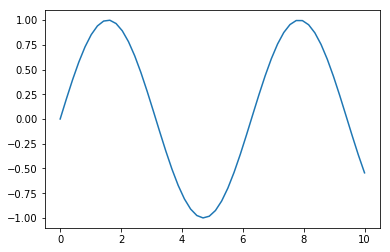

In [67]:
fig, ax = plt.subplots()
ax.plot(x, y)

### <span style="color:#0b486b">2.4 title and labels</span>


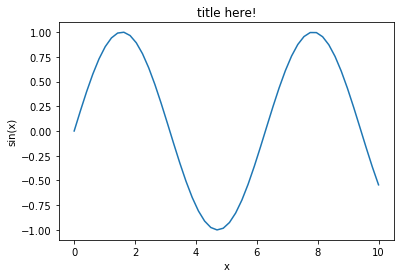

In [68]:
ax.set_title('title here!')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
fig

You can also use $\LaTeX$ in title or labels, or change the font size or font family.

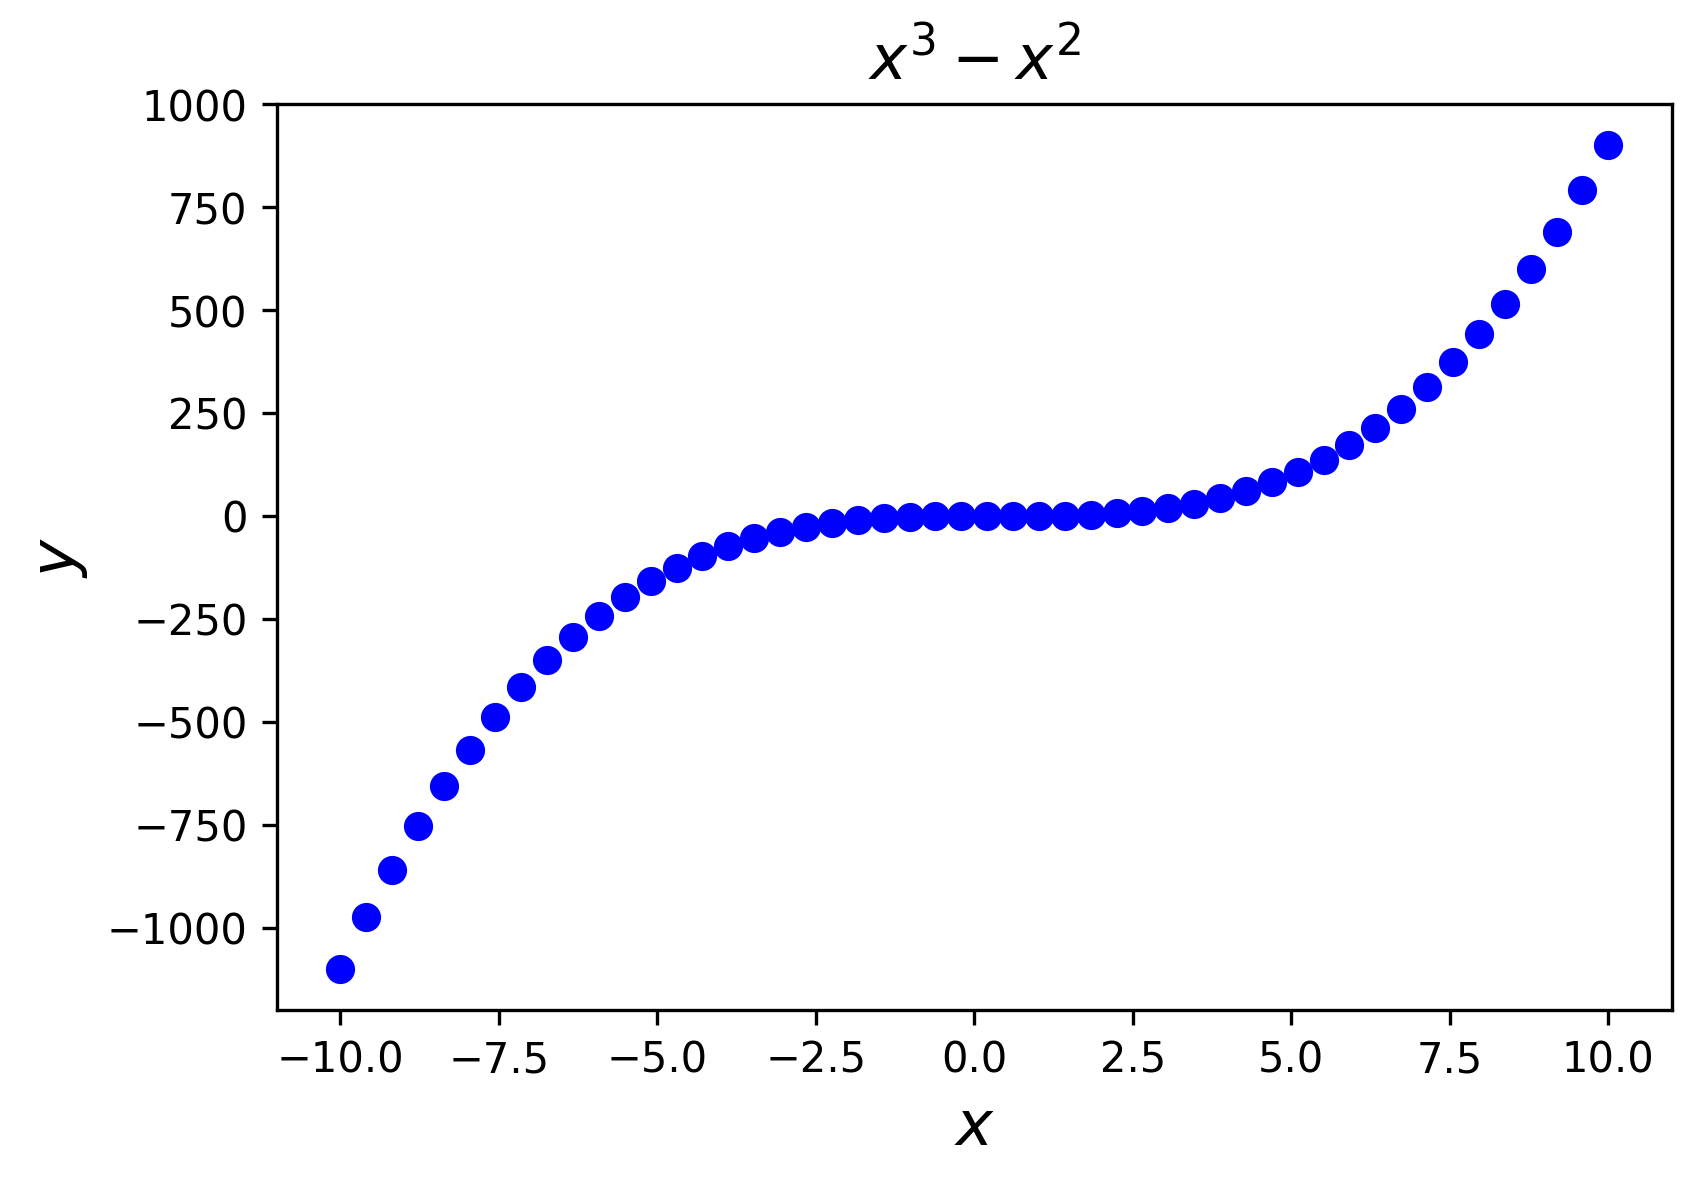

In [69]:
x = np.linspace(-10, 10)
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.plot(x, x**3-x**2, 'bo', lw=3)

ax.set_title('$x^3-x^2$', fontsize=15)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)

### <span style="color:#0b486b">2.5 Subplots</span>

You can pass the number of subplots to `'subplots()'`. In this case, `'axes'` will be an array that each of its elements associates with one of the subgraphs. You can set properties of each `'ax'` object separately like the cell below. 

Obviously you caould use a loop to iterate over `'axes'`.

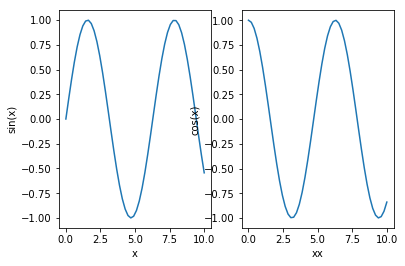

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2)

x = np.linspace(0, 10)

axes[0].plot(x, np.sin(x))
axes[0].set_xlabel('x')
axes[0].set_ylabel('sin(x)')

axes[1].plot(x, np.cos(x))
axes[1].set_xlabel('xx')
axes[1].set_ylabel('cos(x)')

`'cos(x)'` label is overlapping with the `'sin'` graph. You can adjust the size of the graph or space between the subplots to fix it.

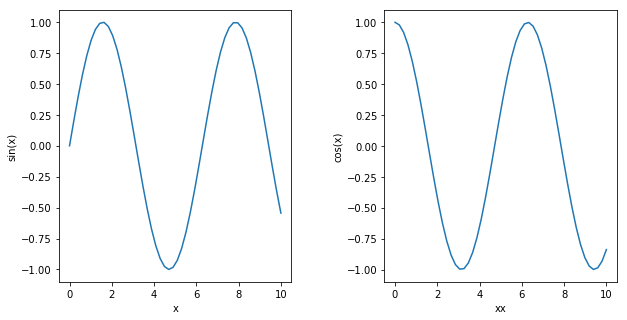

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.4)
x = np.linspace(0, 10)

axes[0].plot(x, np.sin(x))
axes[0].set_xlabel('x')
axes[0].set_ylabel('sin(x)')

axes[1].plot(x, np.cos(x))
axes[1].set_xlabel('xx')
axes[1].set_ylabel('cos(x)')

### <span style="color:#0b486b">2.6 Legend</span>


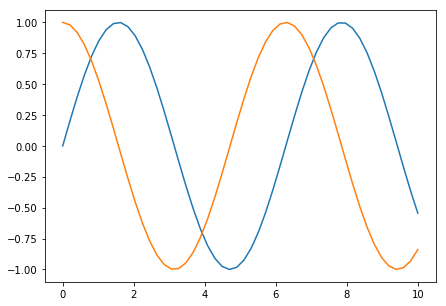

In [72]:
x = np.linspace(0, 10)
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x, np.sin(x), label='$sin(x)$')
ax.plot(x, np.cos(x), label='$cos(x)$')
# ax.legend(fontsize=16, loc=3)


### <span style="color:#0b486b">2.7 Customizing ticks</span>


In many cases you want to customize the ticks and their labels on x or y axis. First draw a simple graph and look at the ticks on x-axis. 

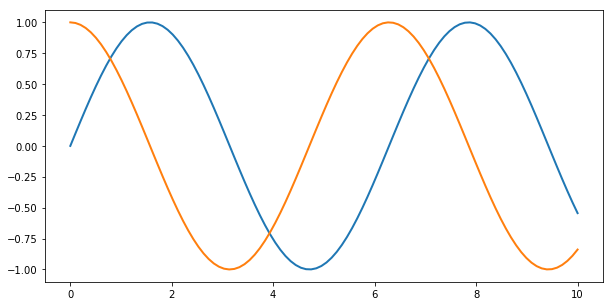

In [73]:
x = np.linspace(0, 10, num=100)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, np.sin(x), x, np.cos(x), lw=2)

You can change the ticks easily with passing a list (or array) to `'set_xticks()'` or `'set_yticks()'`:

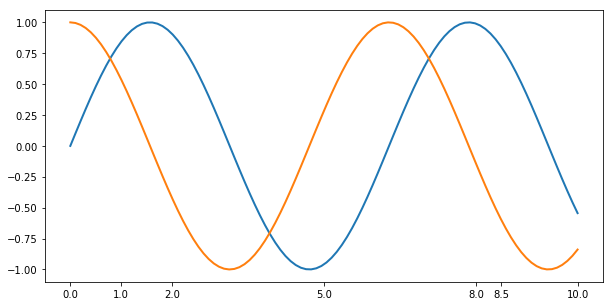

In [74]:
xticks = [0, 1, 2, 5, 8, 8.5, 10]
ax.set_xticks(xticks)
fig

Or even you can change the labels:

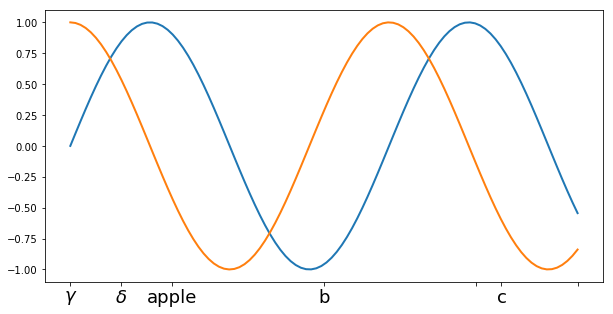

In [75]:
xticklabels = ['$\gamma$', '$\delta$', 'apple', 'b', '', 'c'] 
ax.set_xticklabels(xticklabels, fontsize=18)
fig

### <span style="color:#0b486b">2.8 Saving figures</span>


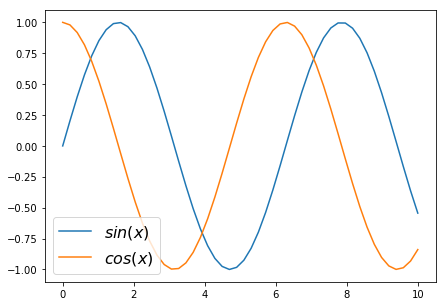

In [76]:
x = np.linspace(0, 10)
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x, np.sin(x), label='$sin(x)$')
ax.plot(x, np.cos(x), label='$cos(x)$')
ax.legend(fontsize=16, loc=3)
fig.savefig('myfig.pdf', format='PDF', dpi=300)

### <span style="color:#0b486b">2.9 Other plot styles</span>

There are many other plot types in addition to simple `'plot'` supported by `'matplotlib'`. You will find a complete list of them on [matplotlib gallery](http://matplotlib.org/gallery.html).

#### <span style="color:#0b486b">2.9.1 Scatter plot</span>



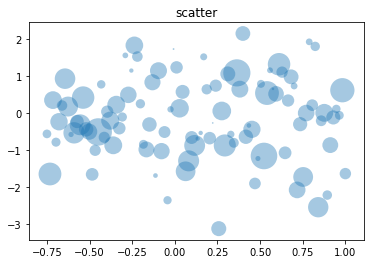

In [77]:
fig, ax = plt.subplots()

x = np.linspace(-0.75, 1., 100)
ax.scatter(x, np.random.randn(x.shape[0]), 
                   s = 250*np.abs(np.random.randn(x.shape[0])), 
                   alpha=0.4,
                  edgecolor='none')
ax.set_title('scatter')

#### <span style="color:#0b486b">2.9.1 Bar plot</span>


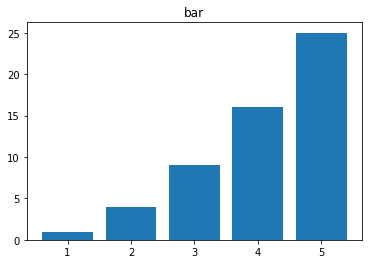

In [78]:
fig, ax = plt.subplots()

x = np.arange(1, 6)
ax.bar(x, x**2, align="center")
ax.set_title('bar')

---
## <span style="color:#0b486b">3. File I/O</span>

### <span style="color:#0b486b">3.1 TXT</span>


TXT file format is the most simplestic way to store data. 

Load a TXT file with `'np.loadtxt()'`:

In [79]:
x = np.loadtxt("data/txt_data1.txt")
x

array([ 2. ,  4.5,  2. ,  0. , -2. ])

Save a TXT file with `'np.savetxt()'`:

In [80]:
y = np.random.randint(10, size=5)
np.savetxt("data/txt_data2.txt", y)
y

array([4, 9, 2, 7, 1])

### <span style="color:#0b486b">3.2 CSV</span>



Comma Separated Values format and its variations, are one the most used file format to store data.

You can use `'np.genfromtxt()'` to read a CSV file:
**NOTE:** The best way to read CSV and XLS files is suing **pandas** package that will be introduced later.

In [81]:
x = np.genfromtxt("data/csv_data1.csv", delimiter=",")
x

array([[ 5.,  8.,  9.,  0.],
       [ 0.,  4.,  6.,  5.],
       [ 9.,  9.,  5.,  2.],
       [ 0.,  8.,  3.,  6.],
       [ 7.,  9.,  8.,  6.],
       [ 1.,  1.,  5.,  3.]])

Use `'np.savetxt()'` to save a 2d-array in a CSV file.

In [82]:
x = np.random.randint(10, size=(6,4))
np.savetxt("data/csv_data2.csv", x, delimiter=',')
x

array([[2, 8, 3, 2],
       [9, 2, 3, 2],
       [7, 0, 6, 9],
       [8, 2, 1, 1],
       [2, 2, 6, 2],
       [4, 5, 1, 7]])

### <span style="color:#0b486b">3.3 JSON</span>


JSON is the most used file format when dealing with web services. 

To read a JSON file, use `'json'` package and `'load()'` function, or `'loads()'` if the data is serialized. It reads the data and parses it into a dictionary.

In [83]:
import json
with open("data/json_data1.json", 'rb') as fp:
    fcontent = fp.read()
data = json.loads(fcontent)
data.keys()

dict_keys(['firstName', 'lastName', 'isAlive', 'age', 'address', 'phoneNumbers', 'children', 'spouse'])

In [84]:
data


{'address': {'city': 'New York',
  'postalCode': '10021-3100',
  'state': 'NY',
  'streetAddress': '21 2nd Street'},
 'age': 25,
 'children': [],
 'firstName': 'John',
 'isAlive': True,
 'lastName': 'Smith',
 'phoneNumbers': [{'number': '212 555-1234', 'type': 'home'},
  {'number': '646 555-4567', 'type': 'office'}],
 'spouse': None}

In [85]:
data['phoneNumbers']

[{'number': '212 555-1234', 'type': 'home'},
 {'number': '646 555-4567', 'type': 'office'}]

You can also write a python dictionary into a JSON file. To do this use `'dump()'` or `'dumps()'` functions.

In [86]:
data = [{'Name': 'Zara', 'Age': 7, 'Class': 'First'}, 
        {'Name': 'Lily', 'Age': 9, 'Class': 'Third'}];
data

[{'Age': 7, 'Class': 'First', 'Name': 'Zara'},
 {'Age': 9, 'Class': 'Third', 'Name': 'Lily'}]

In [87]:
with open("data/json_data_now.json", 'w') as fp:
    json.dump(data, fp)

---
## <span style="color:#0b486b">4. Plotting a histogram</span>


### <span style="color:#0b486b">4.1 Dataset</span>


You are provided with a dataset of percentage of body fat and 10 simple body measurements recoreded for 252 men (courtesy of Journal of Statistics Education - JSE). You can read about this and other [JSE datasets here](http://www.amstat.org/publications/jse/jse_data_archive.htm).

First load the data set into an array:

In [88]:
import numpy as np

In [89]:
data = np.genfromtxt("data/fat.dat.txt")
data.shape

(252, 19)

Based on the [dataset description](http://www.amstat.org/publications/jse/datasets/fat.txt), 5th column represents the weight in lbs. Index the weight column and call it `'weights'`:

In [90]:
weights = data[:, 5]
weights

array([ 154.25,  173.25,  154.  ,  184.75,  184.25,  210.25,  181.  ,
        176.  ,  191.  ,  198.25,  186.25,  216.  ,  180.5 ,  205.25,
        187.75,  162.75,  195.75,  209.25,  183.75,  211.75,  179.  ,
        200.5 ,  140.25,  148.75,  151.25,  159.25,  131.5 ,  148.  ,
        133.25,  160.75,  182.  ,  160.25,  168.  ,  218.5 ,  247.25,
        191.75,  202.25,  196.75,  363.15,  203.  ,  262.75,  205.  ,
        217.  ,  212.  ,  125.25,  164.25,  133.5 ,  148.5 ,  135.75,
        127.5 ,  158.25,  139.25,  137.25,  152.75,  136.25,  198.  ,
        181.5 ,  201.25,  202.5 ,  179.75,  216.  ,  178.75,  193.25,
        178.  ,  205.5 ,  183.5 ,  151.5 ,  154.75,  155.25,  156.75,
        167.5 ,  146.75,  160.75,  125.  ,  143.  ,  148.25,  162.5 ,
        177.75,  161.25,  171.25,  163.75,  150.25,  190.25,  170.75,
        168.  ,  167.  ,  157.75,  160.  ,  176.75,  176.  ,  177.  ,
        179.75,  165.25,  192.5 ,  184.25,  224.5 ,  188.75,  162.5 ,
        156.5 ,  197

Use array operators to convert the weigts into kg. 1 lb equals to 0.453592 kg.

In [91]:
a = 3
a = a + 4
a += 4

In [92]:
weights *= 0.453592
weights = weights.round(2)
weights

array([  69.97,   78.58,   69.85,   83.8 ,   83.57,   95.37,   82.1 ,
         79.83,   86.64,   89.92,   84.48,   97.98,   81.87,   93.1 ,
         85.16,   73.82,   88.79,   94.91,   83.35,   96.05,   81.19,
         90.95,   63.62,   67.47,   68.61,   72.23,   59.65,   67.13,
         60.44,   72.91,   82.55,   72.69,   76.2 ,   99.11,  112.15,
         86.98,   91.74,   89.24,  164.72,   92.08,  119.18,   92.99,
         98.43,   96.16,   56.81,   74.5 ,   60.55,   67.36,   61.58,
         57.83,   71.78,   63.16,   62.26,   69.29,   61.8 ,   89.81,
         82.33,   91.29,   91.85,   81.53,   97.98,   81.08,   87.66,
         80.74,   93.21,   83.23,   68.72,   70.19,   70.42,   71.1 ,
         75.98,   66.56,   72.91,   56.7 ,   64.86,   67.25,   73.71,
         80.63,   73.14,   77.68,   74.28,   68.15,   86.3 ,   77.45,
         76.2 ,   75.75,   71.55,   72.57,   80.17,   79.83,   80.29,
         81.53,   74.96,   87.32,   83.57,  101.83,   85.62,   73.71,
         70.99,   89

### <span style="color:#0b486b">4.2 Histogram</span>


A histogtram is a bar plot that shows you the statistical distribution of the data over a variable. The bars represent the frequency of occurenve by classess of data. We use the package `'matplotlib'` and the function `'hist()'` for plotting the histogram. To learn more about `'matplotlib'` make sure you have read tutorial.

The first line of the cell below if for showing the figure in the notebook and not opening it in a separate window.

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([ 20.,  74.,  83.,  49.,  20.,   5.,   0.,   0.,   0.,   1.]),
 array([  53.75 ,   64.847,   75.944,   87.041,   98.138,  109.235,
         120.332,  131.429,  142.526,  153.623,  164.72 ]),
 <a list of 10 Patch objects>)

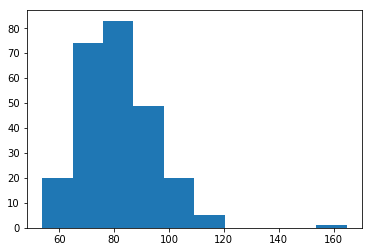

In [94]:
fig, ax = plt.subplots()
ax.hist(weights)

The `'hist()'` functions automatically group the data over 10 bins. Usually you need to tweek the number of bins to obtain a more expressive histogram.

(array([  7.,  13.,  30.,  44.,  47.,  36.,  30.,  19.,  16.,   4.,   4.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  53.75  ,   59.2985,   64.847 ,   70.3955,   75.944 ,   81.4925,
          87.041 ,   92.5895,   98.138 ,  103.6865,  109.235 ,  114.7835,
         120.332 ,  125.8805,  131.429 ,  136.9775,  142.526 ,  148.0745,
         153.623 ,  159.1715,  164.72  ]),
 <a list of 20 Patch objects>)

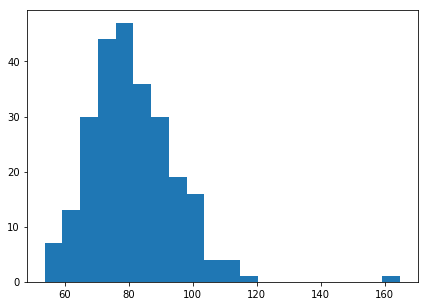

In [95]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(weights, bins=20)
# title
# label

### <span style="color:#0b486b">4.3 Boxplot</span>

A `Boxplot` is a convenient way to graphically display numerical data. 

In [1]:
import matplotlib
fig, ax = matplotlib.pyplot.subplots(figsize=(7, 5))
matplotlib.rcParams.update({'font.size': 14})
ax.boxplot(weights, 0, labels=['group1'])
ax.set_ylabel('weight (kg)', fontsize=16)
ax.set_title('Weights BoxPlot', fontsize=16)

AttributeError: module 'matplotlib' has no attribute 'pyplot'